# 2-1. 훈련 세트와 테스트 세트

### 지도 학습과 비지도 학습
- 지도 학습 : 입력과 타겟이 있는 데이터셋을 가지고 학습하는 것 (ex. K최근접 방법)

- 비지도 학습 : 입력만 있고 타겟 데이터가 없는 데이터셋을 가지고 학습하는 것. (비슷한 데이터끼리 묶음) 

- 강화 학습 : 모델이 어떤 행동을 수행한 후 주변 환경에서 행동의 결과를 피드백 받아 개선해나가는 것으로 환경에서 주는 보상값을 최대화하는 방법으로 학습

훈련할 때에는 타겟데이터를 사용하지만, 실제 예측 시에는 타겟 데이터를 사용하지 않는다.

이를 위해서는 __훈련 세트__와 __테스트 세트__로 나눈다.

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 
                31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 
                34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 
                41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0,
                12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 
                500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0,
                620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0,
                975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14 # 도미 35마리, 빙어 14마리

### 테스트 세트로 평가하기

In [15]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

#훈련 셋
train_input = fish_data[:35]
train_target = fish_target[:35]

#테스트 셋
test_input = fish_data[35:]
test_target = fish_target[35:]


kn = kn.fit(train_input, train_target) # 학습시킬 데이터셋과 타겟(정답) 데이터를 넣어준다.

kn.score(test_input, test_target) # 테스트할 데이터셋과 타겟 데이터를 넣어 점수 확인

0.0

정확도가 0점인 이유는 훈련 세트와 테스트 세트에 샘플이 적절하게 섞이지 않은 **샘플링 편향** 때문이다.


### 적절하게 섞기

In [25]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [26]:
train_input, train_target

(array([[  32. ,  340. ],
        [  12.4,   13.4],
        [  14.3,   19.7],
        [  12.2,   12.2],
        [  33. ,  700. ],
        [  36. ,  714. ],
        [  35. ,  720. ],
        [  35. ,  725. ],
        [  38.5,  955. ],
        [  33.5,  650. ],
        [  31.5,  500. ],
        [  29. ,  430. ],
        [  41. ,  950. ],
        [  30. ,  450. ],
        [  29. ,  363. ],
        [  29.7,  500. ],
        [  11.3,    8.7],
        [  11.8,   10. ],
        [  13. ,   12.2],
        [  32. ,  600. ],
        [  30.7,  500. ],
        [  33. ,  700. ],
        [  35. ,  700. ],
        [  41. ,  975. ],
        [  38.5,  920. ],
        [  25.4,  242. ],
        [  12. ,    9.8],
        [  39.5,  925. ],
        [  29.7,  450. ],
        [  37. , 1000. ],
        [  31. ,  500. ],
        [  10.5,    7.5],
        [  26.3,  290. ],
        [  34. ,  685. ],
        [  26.5,  340. ]]),
 array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 

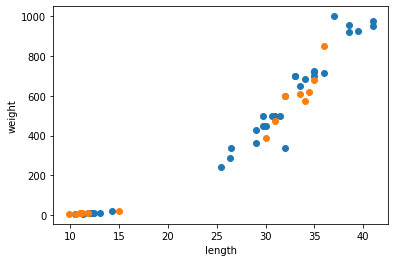

In [22]:
# 분포 그려보기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
# 재 학습하기

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [28]:
# 테스트셋 예측하기 (타겟값 X)

kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [30]:
test_target # 일치!

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 2-2. 데이터 전처리

In [31]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 37.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
               925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0,
               9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [33]:
#Numpy의 column_stack을 이용해 length와 weight를 합치기
fish_data = np.column_stack((fish_length, fish_weight))

# 정답 데이터 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #1로 된 np.ones array와 np.zeros array를 합친다.

In [34]:
#scikitlearn을 이용해 훈련세트와 테스트세트로 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42) #랜덤값 42로 섞어주기 (결과는 누구나 똑같다)

### 수상한 도미 한 마리

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

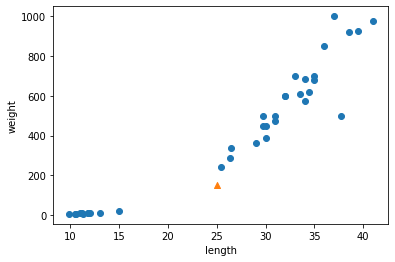

In [36]:
# 그려보기 (정답이 없는 데이터 하나 추가)
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^') #정답이 없는 데이터 하나 추가
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
print(kn.predict([[25,150]])) #25cm, 150g인 물고기가 빙어라고 예측됨

[0.]


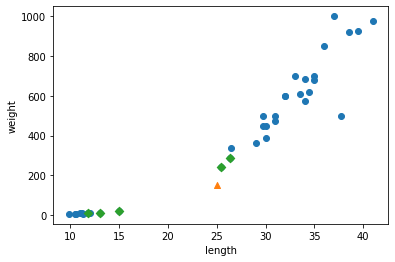

In [40]:
#분류된 물고기들과 인접한 거리, 인덱스를 계산해보기
distances, indexes = kn.kneighbors([[25, 150]]) # 가장 가까운 5개의 샘플과의 거리를 보여줌

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D') #수상한 물고기와 인접한 물고기 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [43]:
print(train_input[indexes], train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]] [[1. 0. 0. 1. 0.]]


In [45]:
print(distances)
#실제론 도미와 거리가 가깝지만, 스케일이 멀어 제대로 예측이 안되었음 (length의 범위 : 10~40, weight의 범위 : 0~1000)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


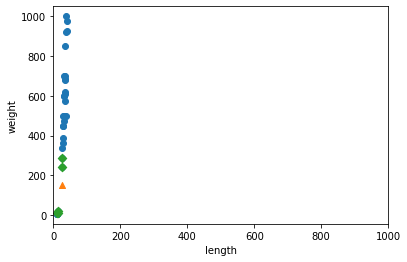

In [46]:
# 기준 맞춰보기

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim((0, 1000)) # 수동으로 범위값을 정해줄 수 있음
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이렇게 스케일이 다른 특성을 일정한 기준으로 맞추는 과정을 **데이터 전처리**라고 한다.

가장 대표적인 전처리 방법 중 하나는 표준 점수를 구하는 것이다.

In [48]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

[ 26.36944444 418.08888889] [ 10.36060432 321.67847023]


In [52]:
train_scaled = (train_input - mean)/std
print(train_scaled) #Numpy에서는 모든 행에 계산을 실행해주는 브로드 캐스팅 기능이 있다!

[[ 0.35041928  0.09920189]
 [ 0.25389982 -0.17125451]
 [ 0.32146344  0.2546366 ]
 [-1.45449474 -1.27266487]
 [-1.406235   -1.26862357]
 [-1.29041164 -1.26178444]
 [ 0.54345822  0.56550602]
 [ 1.09361918  0.2546366 ]
 [ 0.63997768  0.87637544]
 [ 0.83301662  0.87637544]
 [ 1.41213341  1.73126635]
 [ 1.17083475  1.56028817]
 [-0.09357026 -0.54740651]
 [-1.38693111 -1.26924531]
 [ 1.26735421  1.57583164]
 [ 0.32146344  0.09920189]
 [ 1.02605555  1.80898371]
 [ 0.44693875  0.2546366 ]
 [-1.53171031 -1.2763953 ]
 [-0.00670274 -0.39818919]
 [ 0.73649715  0.82974503]
 [ 0.01260115 -0.24275448]
 [-1.52205836 -1.27794965]
 [-1.59927394 -1.27888226]
 [ 0.83301662  0.81420156]
 [-1.46414668 -1.26924531]
 [ 0.44693875  0.17691924]
 [ 0.78475688  0.6276799 ]
 [ 0.68823742  0.59659296]
 [-1.09737271 -1.2378475 ]
 [ 0.73649715  0.48778866]
 [ 0.35041928 -0.08731977]
 [-1.406235   -1.26893444]
 [ 0.54345822  0.56550602]
 [ 0.92953608  1.34267957]
 [-1.48345058 -1.26955618]]


### 전처리 데이터로 모델 훈련하기

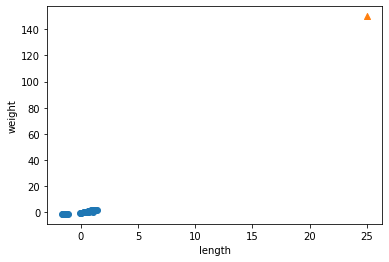

In [53]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

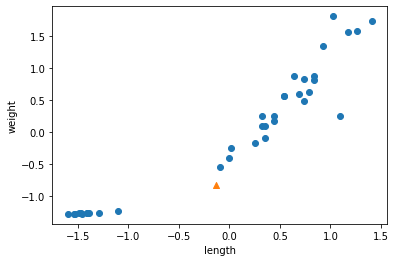

In [55]:
# 동떨어진 수상한 물고기만 떨어져 있다.
# 이를 해결하기 위해서 샘플도 동일하게 계산을 해주어야 한다.

new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #해결 !

In [57]:
#테스트 세트에도 동일한 작업 실행후 훈련

test_scaled = (test_input - mean) / std

kn.fit(train_scaled, train_target)

kn.score(test_scaled, test_target)

1.0

In [59]:
print(kn.predict([new])) # 수상한 물고기 예측값 : 1 (도미로 나옴)

[1.]


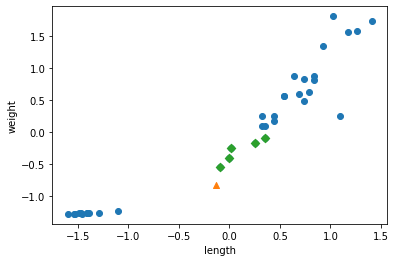

In [61]:
#수상한 물고기와 가까운 거리에 있는 물고기 인덱스 구하여 나타내기

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #제대로 나옴!